In [1]:
import numpy as np
import IPython.display as ipd
from sklearn.ensemble import RandomForestClassifier
import warnings
import librosa
import librosa.display
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Load Data

In [7]:
X_train = np.load("xtrain_spec.npy")
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
train = np.load("train.npy")
y_train = train[:,0]
X_labeled = X_train[y_train != -1]
y_labeled = y_train[y_train != -1]
X_unlabeled = X_train[y_train == -1]
y_unlabeled = y_train[y_train == -1]
del train

X_test = np.load("test_spec.npy")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# PCA

In [8]:
pca = PCA(n_components=1000)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[4.30495258e-01 1.79914217e-01 4.78489892e-02 1.77153116e-02
 1.20099768e-02 8.73604241e-03 6.31408684e-03 4.74506220e-03
 3.71045227e-03 3.69787215e-03 3.31058764e-03 2.93725779e-03
 2.90685819e-03 2.77334528e-03 2.65100388e-03 2.59386489e-03
 2.36487028e-03 2.27360210e-03 2.24294083e-03 2.18420959e-03
 2.10785740e-03 1.83049703e-03 1.79823932e-03 1.75391243e-03
 1.65178847e-03 1.55101301e-03 1.53489716e-03 1.40352704e-03
 1.38571100e-03 1.37011354e-03 1.32496170e-03 1.22455666e-03
 1.19328342e-03 1.16949502e-03 1.11178571e-03 1.07210301e-03
 1.05171608e-03 1.03683874e-03 1.02785348e-03 9.80506909e-04
 9.73421408e-04 9.56251191e-04 9.52760485e-04 9.27533850e-04
 9.04431709e-04 8.96494062e-04 8.63974186e-04 8.39207702e-04
 8.24994368e-04 8.08207987e-04 7.89340845e-04 7.57462262e-04
 7.34917532e-04 7.15342055e-04 6.92358995e-04 6.89872948e-04
 6.84436247e-04 6.65864256e-04 6.52428789e-04 6.34015945e-04
 6.30110592e-04 6.19152421e-04 6.10152401e-04 5.97908866e-04
 5.92344402e-04 5.862583

In [9]:
cum = [pca.explained_variance_ratio_[0]]
for i in range(1, len(pca.explained_variance_ratio_)):
    cum.append(cum[-1] + pca.explained_variance_ratio_[i])

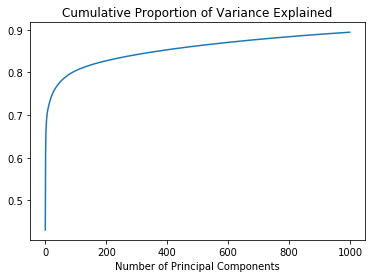

In [10]:
plt.title("Cumulative Proportion of Variance Explained")
plt.xlabel("Number of Principal Components")
plt.plot(cum)

# Random Forest Classification

In [14]:
X_dimred = pca.transform(X_train)
X_labeled = X_dimred[y_train != -1]
y_labeled = y_train[y_train != -1]
X_unlabeled = X_dimred[y_train == -1]
y_unlabeled = y_train[y_train == -1]
means = [np.mean(X_dimred[y_train == k],axis=0) for k in range(10)]
for i in range(len(X_unlabeled)):
    y_unlabeled[i] = np.argmin([np.linalg.norm(X_unlabeled[i] - means[k]) for k in range(10)])
y_unlabeled[:10]
clf = RandomForestClassifier()
clf.fit(np.concatenate((X_labeled,X_unlabeled), axis=0), np.concatenate((y_labeled,y_unlabeled), axis=0))
predictions = clf.predict(pca.transform(X_test))

# Write Predictions

In [15]:
with open("predictions.csv", "w") as f:
    f.write("Id,Prediction\n")
    for i, u in enumerate(predictions):
        f.write(str(i) + "," + str(int(u)) + "\n")

# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [10]:
SAMPLE_RATE = 22050

In [11]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)